In [80]:
# Importing Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# reading the data

In [83]:
df = pd.read_excel('glass.xlsx', sheet_name=1)

In [84]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [85]:
# EDA

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [87]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


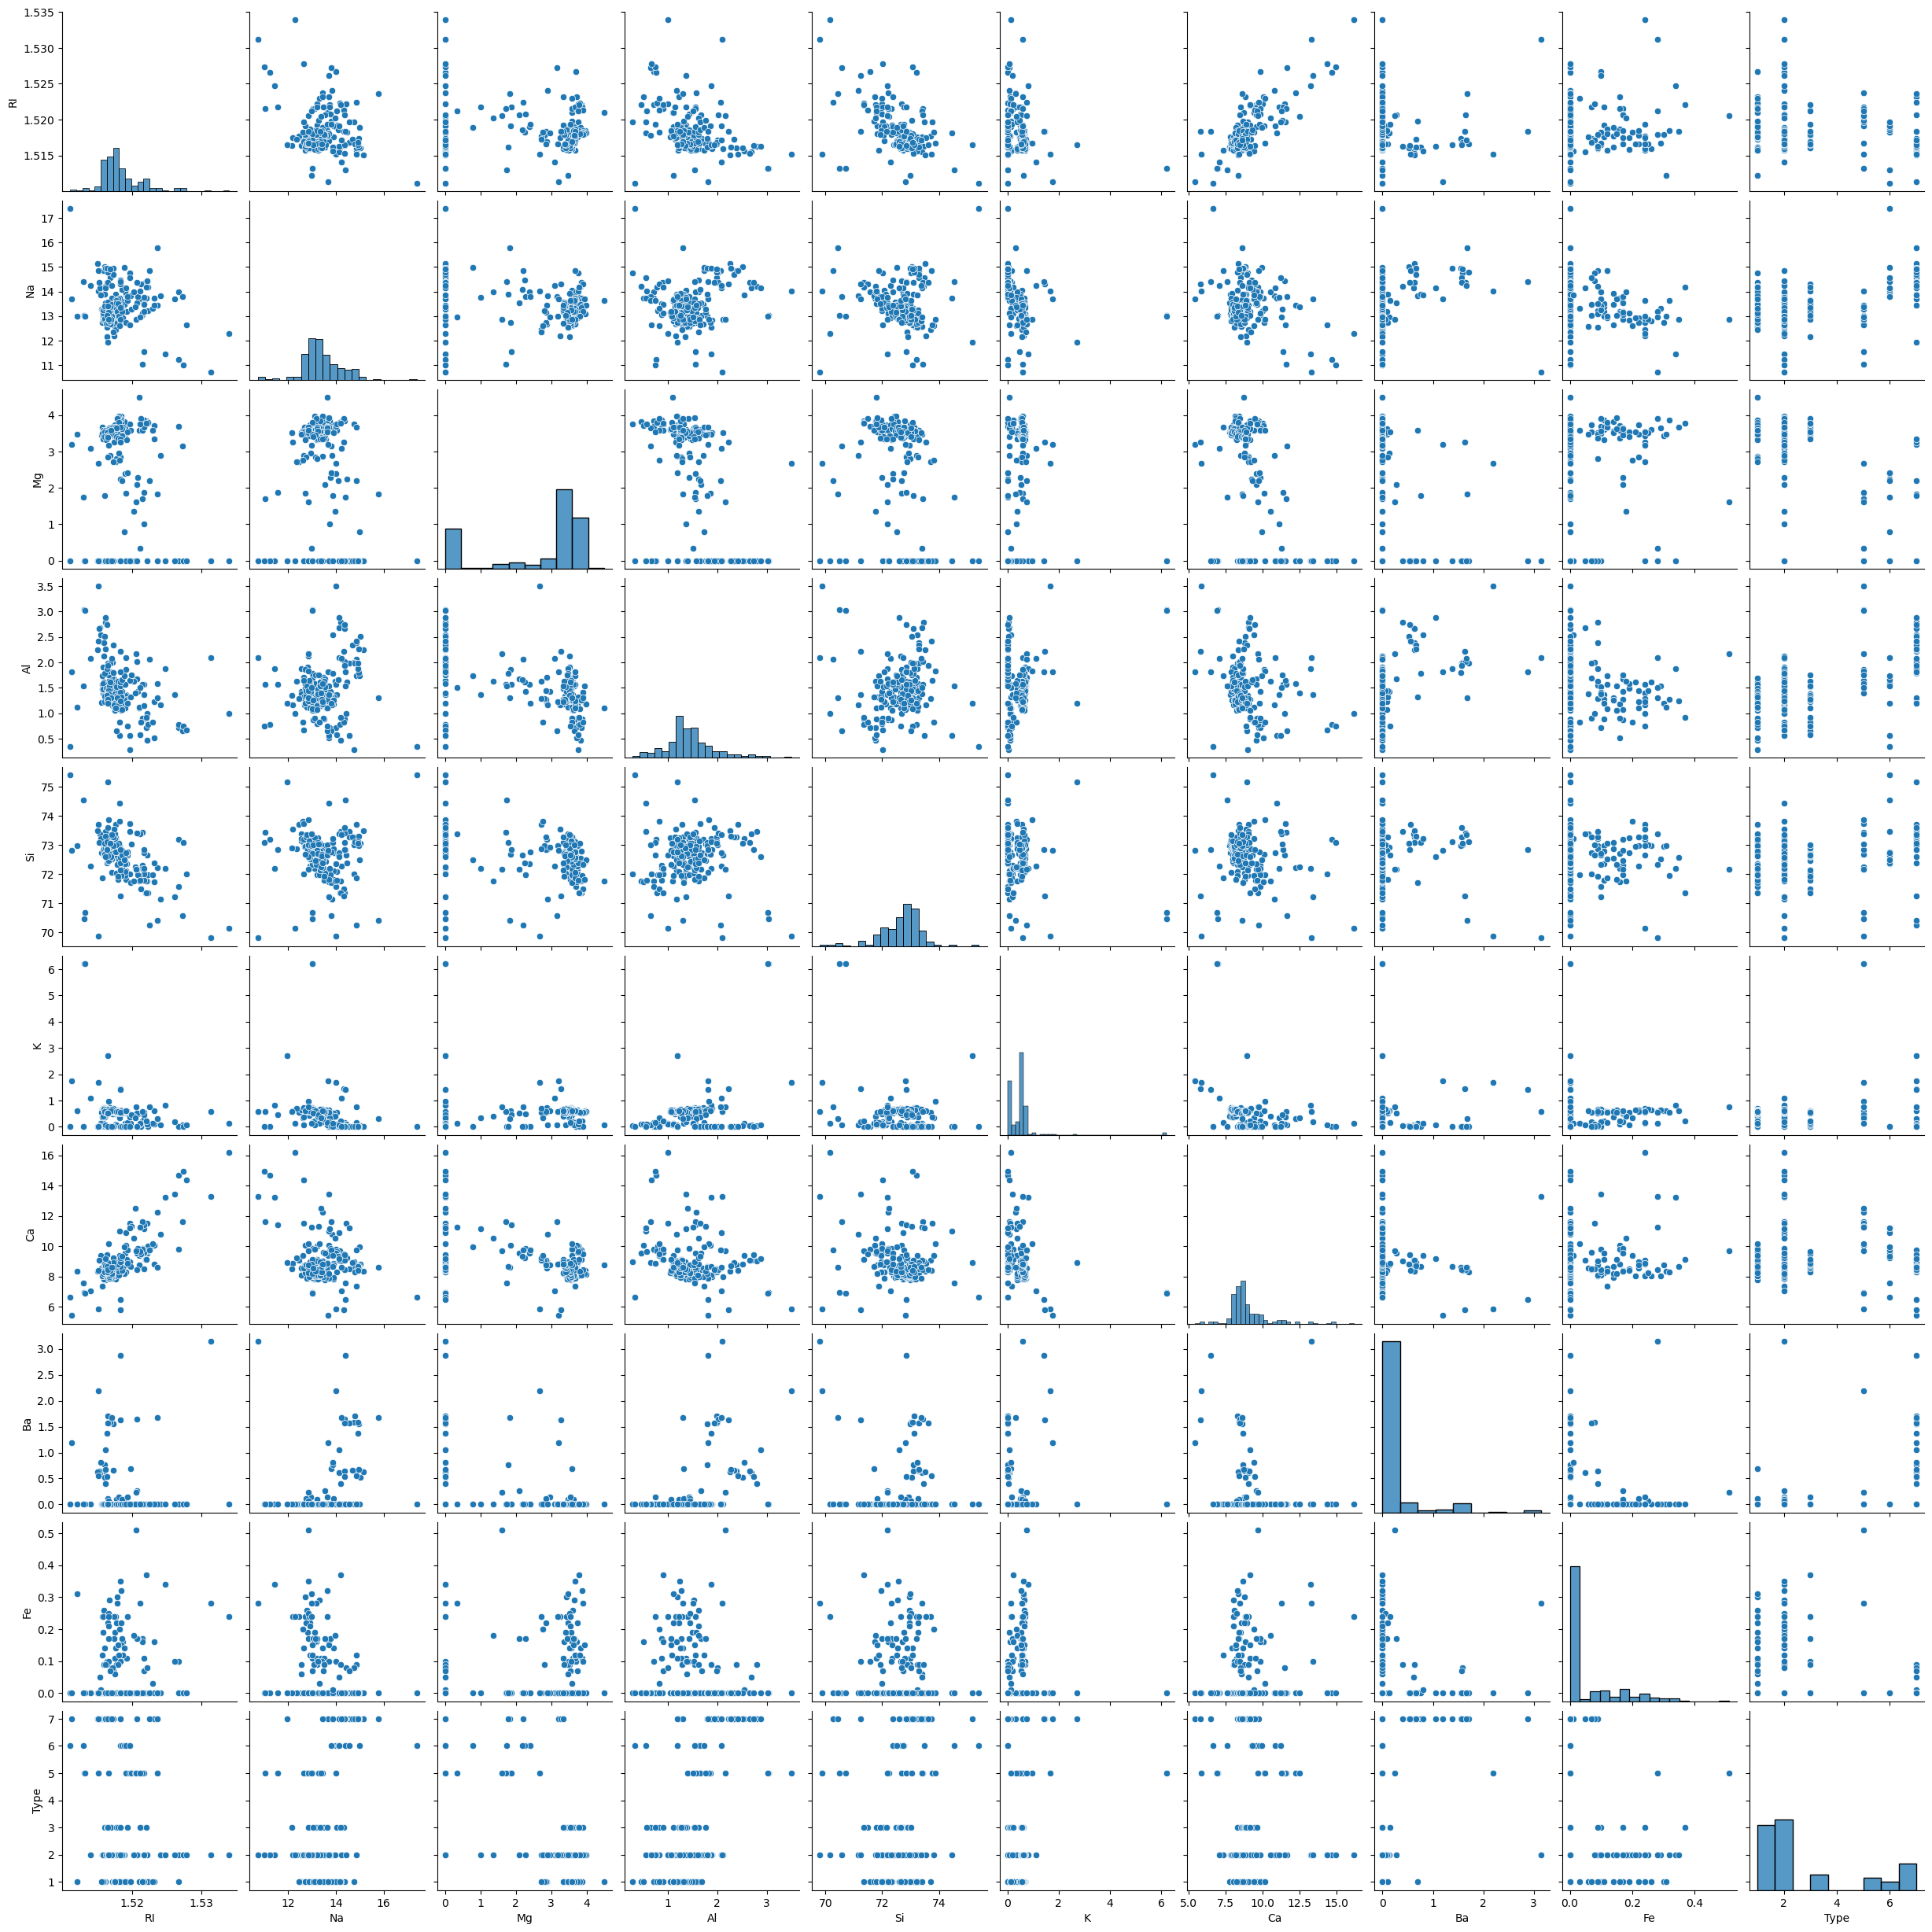

In [88]:
sns.pairplot(df)
plt.show()

In [89]:
cols = df.columns

In [90]:
cols

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [91]:
# Dropping 'Type' since it is target

In [92]:
cols1 = cols.delete(9)

In [93]:
cols1

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [94]:
# Plotting Histogram of each column

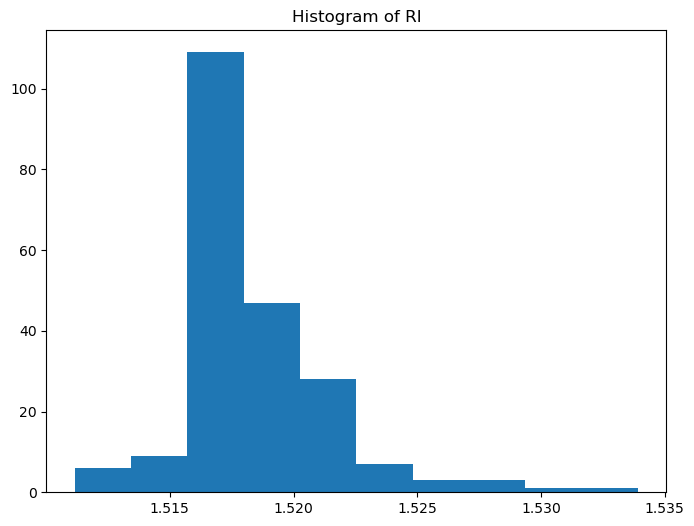

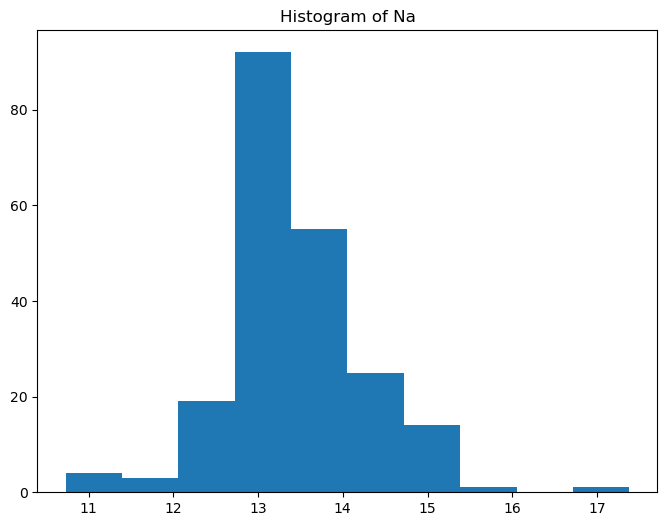

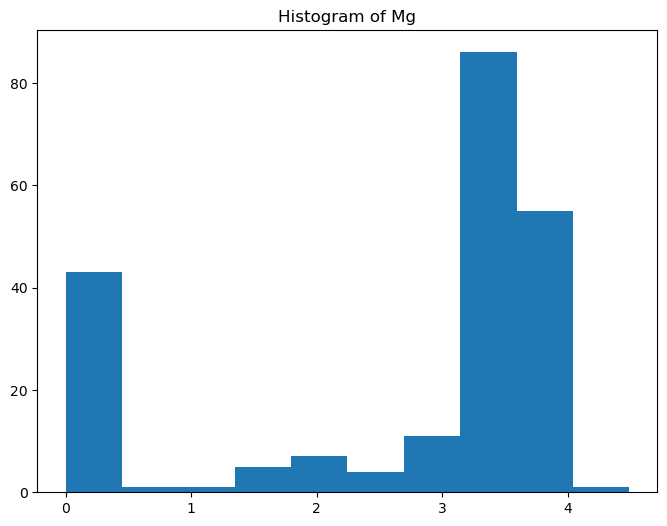

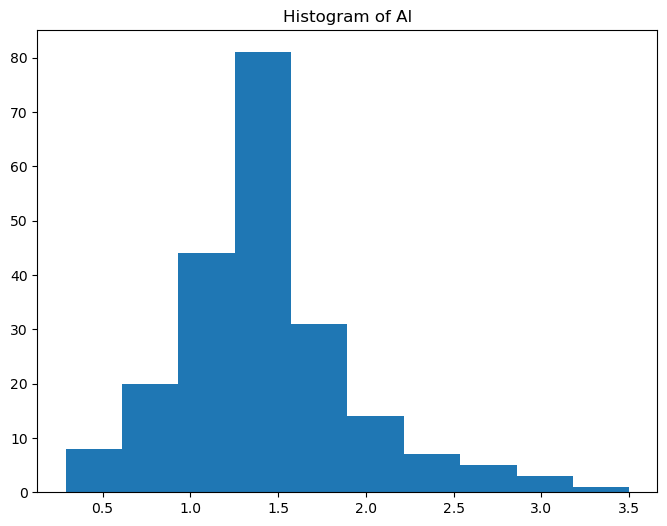

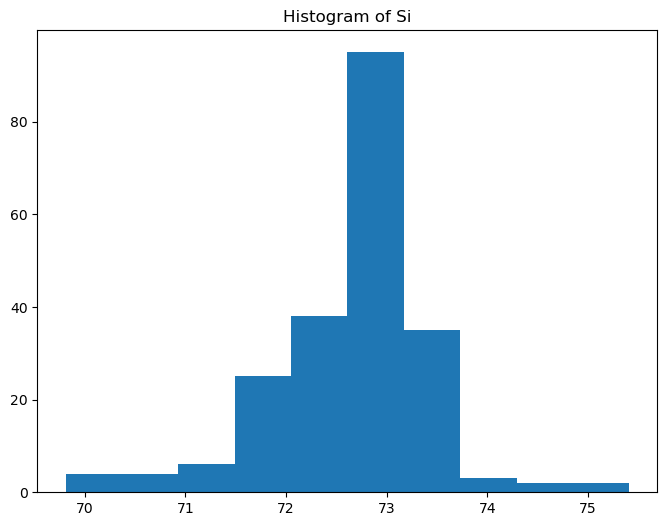

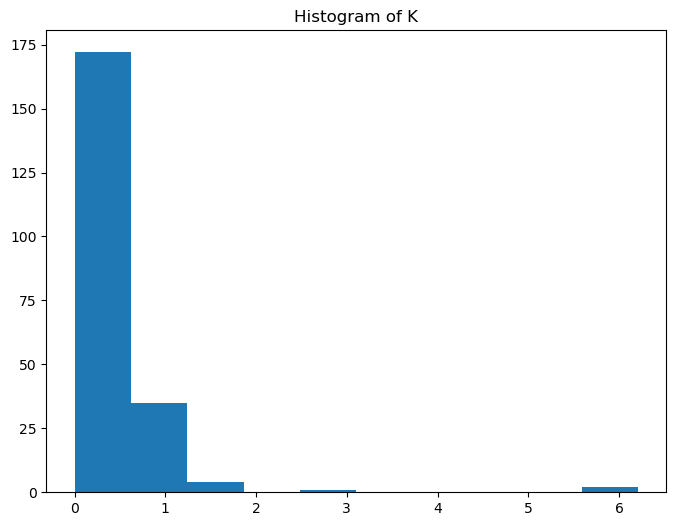

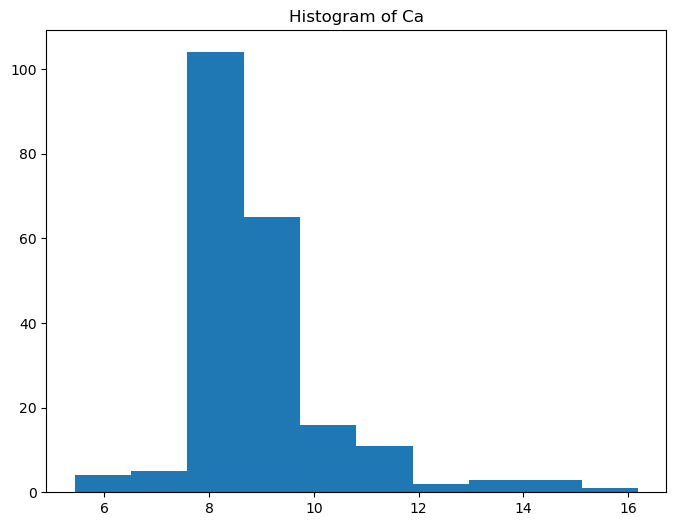

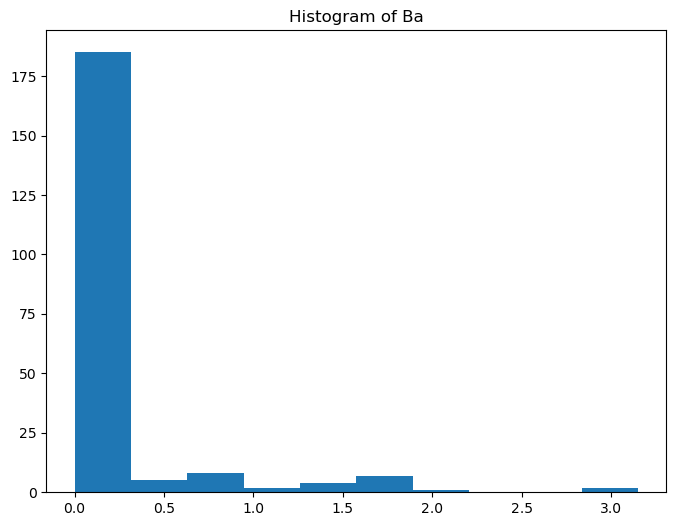

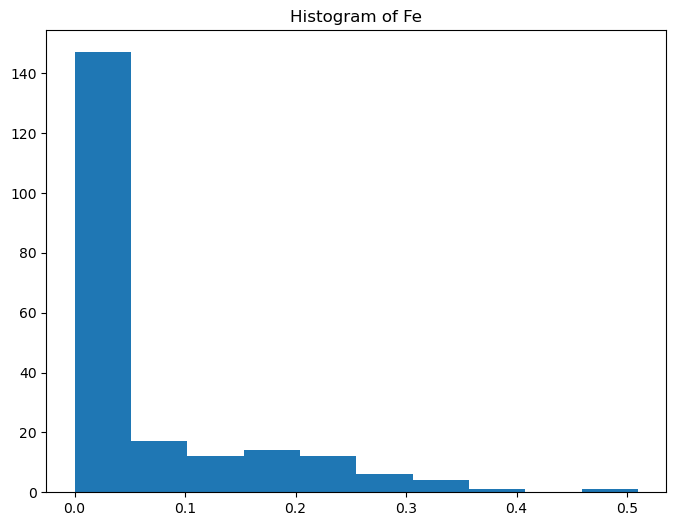

In [95]:
for col in cols1:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col])
        plt.title(f'Histogram of {col}')
        plt.show()

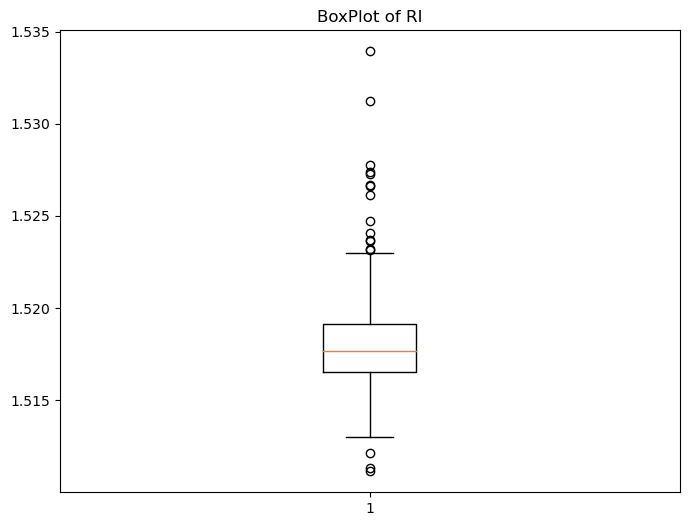

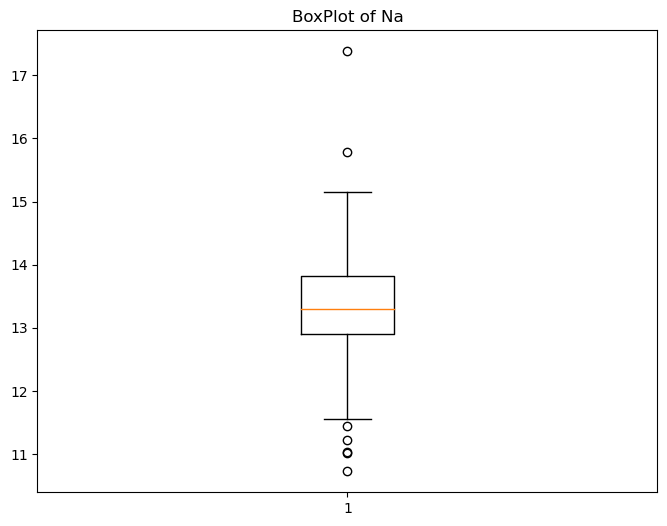

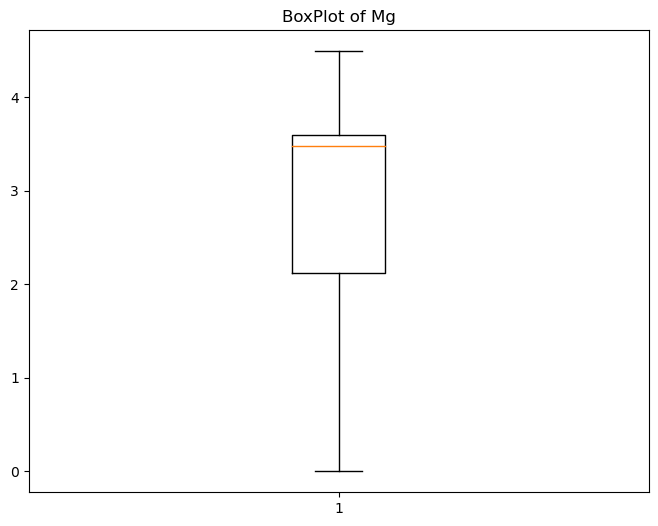

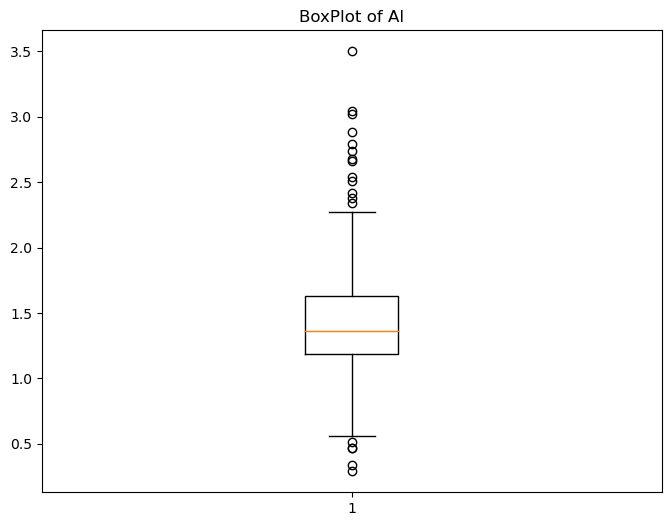

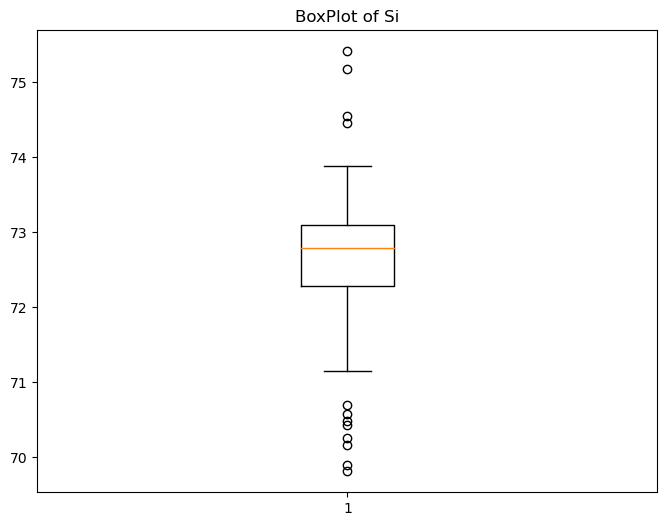

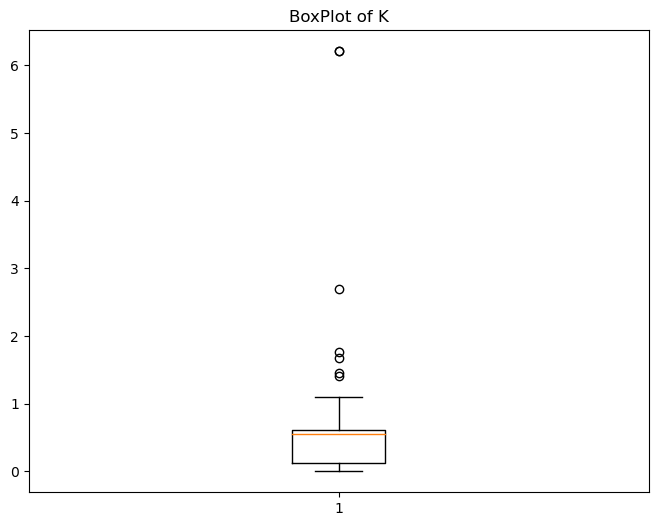

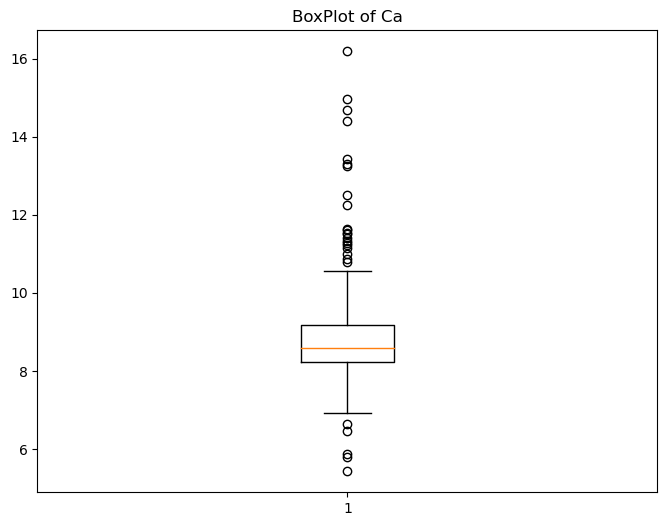

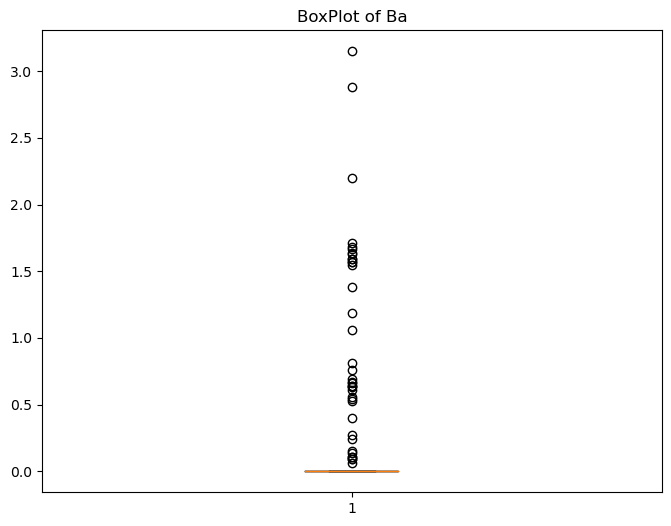

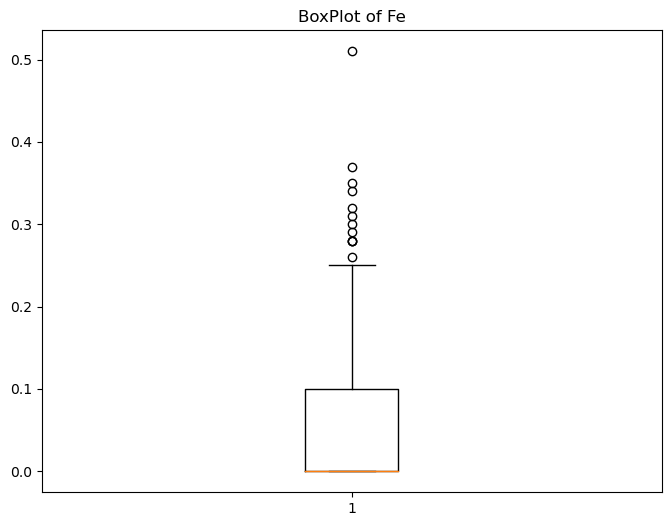

In [96]:
for col in cols1:
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[col])
        plt.title(f'BoxPlot of {col}')
        plt.show()

In [97]:
# Doing log tranformation to reduce skewness and remove outlier

In [98]:
for col in cols1:
        df[col] = np.log1p(df[col])

In [99]:
# Applying standard scaling on all cols

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()

In [102]:
scaled_values = scaler.fit_transform(df[cols1])

In [103]:
df[cols1] = scaled_values

In [104]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.873855,0.312264,0.889838,-0.662453,-1.123936,-1.096725,-0.093038,-0.386880,-0.600632,1
1,-0.249011,0.613191,0.595470,-0.077186,0.107101,0.129847,-0.855800,-0.386880,-0.600632,1
2,-0.721728,0.178224,0.577281,0.291363,0.441253,-0.100708,-0.899502,-0.386880,-0.600632,1
3,-0.232487,-0.217557,0.627718,-0.228159,-0.047520,0.346787,-0.523182,-0.386880,-0.600632,1
4,-0.311804,-0.142674,0.602690,-0.338850,0.556647,0.299673,-0.649416,-0.386880,-0.600632,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.705195,0.909107,-1.944344,2.415694,-0.047520,-1.028034,0.239101,2.169571,-0.600632,7
210,-0.500212,1.801917,-1.944344,1.109210,0.531016,-1.310855,-0.374383,2.979450,-0.600632,7
211,0.755035,1.165500,-1.944344,1.159268,0.991319,-1.310855,-0.341704,3.047088,-0.600632,7
212,-0.612616,1.188626,-1.944344,1.024653,1.233360,-1.310855,-0.309163,2.952029,-0.600632,7


In [105]:
# Splitting data into Training and Testing

In [106]:
X = df.drop('Type', axis=1)

In [107]:
y = df['Type']

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# Applying Random Forest Model

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
model = RandomForestClassifier()

In [113]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [114]:
# Making prediction on test splits

In [115]:
y_pred = model.predict(X_test)

In [116]:
# Model Evaluation

In [117]:
from sklearn.metrics import classification_report, accuracy_score

In [118]:
accuracy_score(y_test, y_pred)

0.8372093023255814

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



In [120]:
# Applying Bagging classifier

In [121]:
from sklearn.ensemble import BaggingClassifier

In [122]:
model1 = BaggingClassifier()

In [123]:
model1.fit(X_train, y_train)

BaggingClassifier()

In [124]:
y_pred = model.predict(X_test)

In [125]:
accuracy_score(y_test, y_pred)

0.8372093023255814

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



In [143]:
# Applying LGBoosting Classifier

In [144]:
from lightgbm import LGBMClassifier

In [145]:
model2 = LGBMClassifier()

In [146]:
model2.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 364
[LightGBM] [Info] Number of data points in the train set: 171, number of used features: 9
[LightGBM] [Info] Start training from score -1.064126
[LightGBM] [Info] Start training from score -1.014529
[LightGBM] [Info] Start training from score -2.502606
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -3.349904
[LightGBM] [Info] Start training from score -2.097141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

LGBMClassifier()

In [147]:
y_pred = model.predict(X_test)

In [148]:
accuracy_score(y_test, y_pred)

0.8372093023255814

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43

